# UNIVARIATE LINEAR REGRESSION 

## Table of Contents¶
* Introduction
* Loading Data
* The Hypothesis
* The Cost Function
* Gradient Descent
* Model Training
* Model Evaluation
* Conclusion
* References

## Introduction


This notebook is designe to help deepen your knowledge and understanding of the key underlying concepts that form the foundations of supervised regression model. These skills can be expanded to other related real-life projects such as stock price prediction

## Import Libraries

In [11]:
# import all the lib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load Dataset 

In [35]:
# Get the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Set X and y for training
X_train = pd.DataFrame(data = train_data['x'])
y = pd.DataFrame(data = train_data['y'])

# Set X_test and y_test for evaluation
X_test_data = pd.DataFrame(data = test_data['x'])
y_test = pd.DataFrame(data = test_data['y'])

# Row 213 of the training data has no y value; as a result, we will drop it.
X_train.drop([213], inplace=True)
y.drop([213], inplace=True)

print(X_train.head())

# Convert the dataframes to a numpy arrays
X = X_train.to_numpy()
X_test = X_test_data.to_numpy()

      x
0  24.0
1  50.0
2  15.0
3  38.0
4  87.0


# Linear Regression From Scratch - Andrew Ng Style

## Task 1: Hypothesis 

In [41]:
# The hypothesis
def h(x, theta_0 = 0, theta_1 = 0):
    """
    calculates the predicted values (or predicted targets) for a given set of inputs and thetas.
    :param x: inputs (feature values) - Numpy array of floats 
    :param theta_0: intercept - float
    :param theta_1: slope - float
    :return: predicted targets - Numpy array of floats
    
    """
    return theta_0 + (theta_1 * x)

## Task 2: Cost Function

In [42]:
# Cost function
def J(theta_0, theta_1, X, y):
    """
     calculates the total error for a given set of inputs and thetas.
    :param theta_0: intercept - float
    :param theta_1: slope - float
    :param X: inputs (feature values) - Numpy array of floats
    :param y: inputs (actual target values) - Numpy array of floats 
    :return: total error - floats
    
    """
    diff = (np.subtract(h(X, theta_0, theta_1),np.asarray(y)))
    diff_squared = np.square(diff)
    return (diff_squared.sum()/(len(X)*2))


## Task 3: Gradient Descent


In [43]:
# Gradient descent function
def gradient(theta_0, theta_1, alpha, X, y):
    """
     calculates the gradient descent for a given set of inputs and thetas.
    :param theta_0: intercept - float
    :param theta_1: slope - float
    :param alpha: learning rate - float
    :param X: inputs (feature values) - Numpy array of floats
    :param y: inputs (actual target values) - Numpy array of floats 
    :return: calculated theta_0 and theta_1 - tuple of floats
    
    """
    my_array_0 = (np.subtract(h(X, theta_0, theta_1),np.asarray(y)))
    my_array_1 = np.matmul(np.transpose(my_array_0), X)
    
    theta_0_temp = (alpha / len(X)) * my_array_0.sum()
    theta_1_temp = (alpha / len(X)) * my_array_1.sum()
    
    new_theta_0 = theta_0-theta_0_temp
    new_theta_1 = theta_1-theta_1_temp
    
    return (new_theta_0, new_theta_1) 

## Task 4: Model Training

initial Cost: 1670.0624130893364
cost: 743.1010875141254

Iteration: 1
diff: 926.9613255752109
theta 0: 0.004993986917045781
theta 1: 0.33354245845185376
cost: 331.86123601466835

Iteration: 2
diff: 411.2398514994571
theta 0: 0.008319284972241516
theta 1: 0.5557035214498387
cost: 149.41757755535286

Iteration: 3
diff: 182.4436584593155
theta 0: 0.010533127355656115
theta 1: 0.7036773052035966
cost: 68.47773575109734

Iteration: 4
diff: 80.93984180425552
theta 0: 0.012006667742524593
theta 1: 0.8022375187713469
cost: 32.569345994371076

Iteration: 5
diff: 35.908389756726265
theta 0: 0.012987118705779484
theta 1: 0.8678850693676075
cost: 16.63884219635945

Iteration: 6
diff: 15.930503798011625
theta 0: 0.01363913995457535
theta 1: 0.9116106382126296
cost: 9.571386539860526

Iteration: 7
diff: 7.067455656498925
theta 0: 0.01407240560255936
theta 1: 0.9407347363616418
cost: 6.435959653629739

Iteration: 8
diff: 3.1354268862307872
theta 0: 0.014359965767857044
theta 1: 0.9601333019877012
co

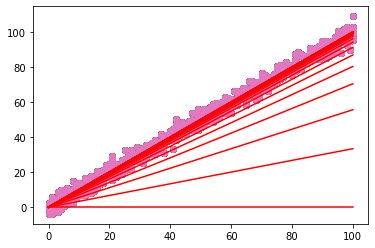

In [44]:
# Initialize theta_0, theta_1 and the learning rate 
alpha = 0.0001
theta_0 = 0
theta_1 = 0

# Convergence threshold
my_diff = 0.000001

# Initial cost value
diff = J(theta_0, theta_1, X, y)
print("initial Cost: {}".format(J(theta_0, theta_1, X, y)))

# We will count the number of iterations
my_iter = 0

while diff >= my_diff:
    # Draw the current hypothesis and the training 
    # set to the x-y plane.
    # We will draw all the hypothesis lines so that
    # the reader can see how the hypothesis changes
    # with each iteration.
    my_line = np.linspace(0,100)
    z = theta_0 + theta_1 * (my_line)
    plt.scatter(X,y)
    plt.plot(my_line,z, 'r')
    
    # calculate initial cost value
    initial_cost = J(theta_0, theta_1, X, y)
    
    # calculate and assign the new theta_0 and theta_1 values
    theta_0, theta_1 = gradient(theta_0, theta_1, alpha, X, y)
    
    # calculate the consecutive cost value
    new_cost = J(theta_0, theta_1, X, y)
    print("cost: {}".format(new_cost))
    
    # calculate the difference between the consecutive
    # cost values
    diff = initial_cost - new_cost
    
    my_iter += 1
    
    print()
    print("Iteration: {}".format(my_iter))
    print("diff: {}".format(diff))
    print("theta 0: {}".format(theta_0))
    print("theta 1: {}".format(theta_1))
    
plt.show() 

initial Cost: 207505.03742208227

Iteration: 10000
Cost: 11.116903205237131
Diff: 0.0003601674161615165

Iteration: 20000
Cost: 8.284498617558627
Diff: 0.00021814652931340106

Iteration: 30000
Cost: 6.568965222022944
Diff: 0.00013212718895427855

Iteration: 40000
Cost: 5.529899389408219
Diff: 8.002691638608894e-05

Iteration: 50000
Cost: 4.900557047651989
Diff: 4.847077574865466e-05

Iteration: 60000
Cost: 4.51937640375524
Diff: 2.935782369295481e-05

Iteration: 70000
Cost: 4.288502563491975
Diff: 1.7781473444777873e-05

Iteration: 80000
Cost: 4.14866668522438
Diff: 1.0769899064122512e-05

Iteration: 90000
Cost: 4.063970762860149
Diff: 6.5231222912132125e-06

Iteration: 100000
Cost: 4.012672059308543
Diff: 3.950930662632857e-06

Iteration: 110000
Cost: 3.981601413725882
Diff: 2.3930032897467868e-06

Iteration: 120000
Cost: 3.9627825167541064
Diff: 1.449396417108062e-06

Final Cost: 3.9538191331407084
Diff: 9.999593206799773e-07
Theta 0: -0.5060916482754081
Theta 1: 1.006631498606685
It

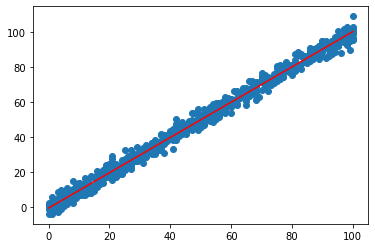

In [45]:
# Initialize theta_0, theta_1 and the learning rate 
alpha = 0.0001
theta_0 = -10
theta_1 = -10

# Convergence threshold
my_diff = 0.000001

# Initial cost value
diff = J(theta_0, theta_1, X, y)

# We will count the number of iterations
my_iter = 0
print("initial Cost: {}".format(J(theta_0, theta_1, X, y)))

while diff >= my_diff:
    # calculate initial cost value
    initial_cost = J(theta_0, theta_1, X, y)
    
    # calculate and assign the new theta_0 and theta_1 values
    theta_0, theta_1 = gradient(theta_0, theta_1, alpha, X, y)
    
    # calculate the consecutive cost value
    new_cost = J(theta_0, theta_1, X, y)
    
    # calculate the difference between the consecutive
    # cost values
    diff = initial_cost - new_cost
    
    # print for every 10000 iteration
    my_iter += 1
    if my_iter%10000 ==0:
        print()
        print("Iteration: {}".format(my_iter))
        print("Cost: {}".format(new_cost))
        print("Diff: {}".format(diff))

print()
print("Final Cost: {}".format(new_cost))
print("Diff: {}".format(diff))
print("Theta 0: {}".format(theta_0))
print("Theta 1: {}".format(theta_1))
print("Iteration: {}".format(my_iter))
print()

# Draw the final hypothesis and the training 
# set to the x-y plane.
# We will not draw all the hypothesis lines 
# because of the high iteration count.
my_line = np.linspace(0,100)
z = theta_0 + theta_1 * (my_line)
plt.scatter(X,y)
plt.plot(my_line,z, 'r')
plt.show() 

## Task 5: Model Evaluation on Test Set

Cost of test data: 4.7015230120840545


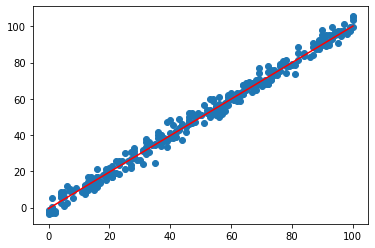

In [46]:
# calculate the cost value for the test set
cost_test = J(theta_0, theta_1, X_test, y_test)
print("Cost of test data: {}".format(cost_test))

# Draw the final hypothesis and the test 
# set to the x-y plane.
my_line = np.linspace(0,100)
z = theta_0 + theta_1 * (my_line)
plt.scatter(X_test,y_test)
plt.plot(my_line,z, 'r')
plt.show() 

## Prediction on Test Set

In [53]:
x_test = X_test.to_list()   #features
Y_test = y_test.to_list()

y_preds = []
for i in range(len(x_test)):

    y_pred = w_final* x_test[i] + b_final 
    
    y_preds.append(y_pred)
    
y_preds 

[60757.06078120104,
 115566.84225871775,
 123126.81211768558,
 64537.04571068495,
 53197.09092223323,
 63592.04947831397,
 116511.83849108873,
 110841.86109686285,
 54142.0871546042]

In [54]:
Y_test

[57189.0,
 116969.0,
 122391.0,
 57081.0,
 56642.0,
 56957.0,
 112635.0,
 105582.0,
 60150.0]

In [ ]:
compute_gradient(x, y, w, b)